In [1]:
from skimage import data
import numpy as np
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from math import radians, cos, sin
from skimage.transform import swirl
from sys import float_info

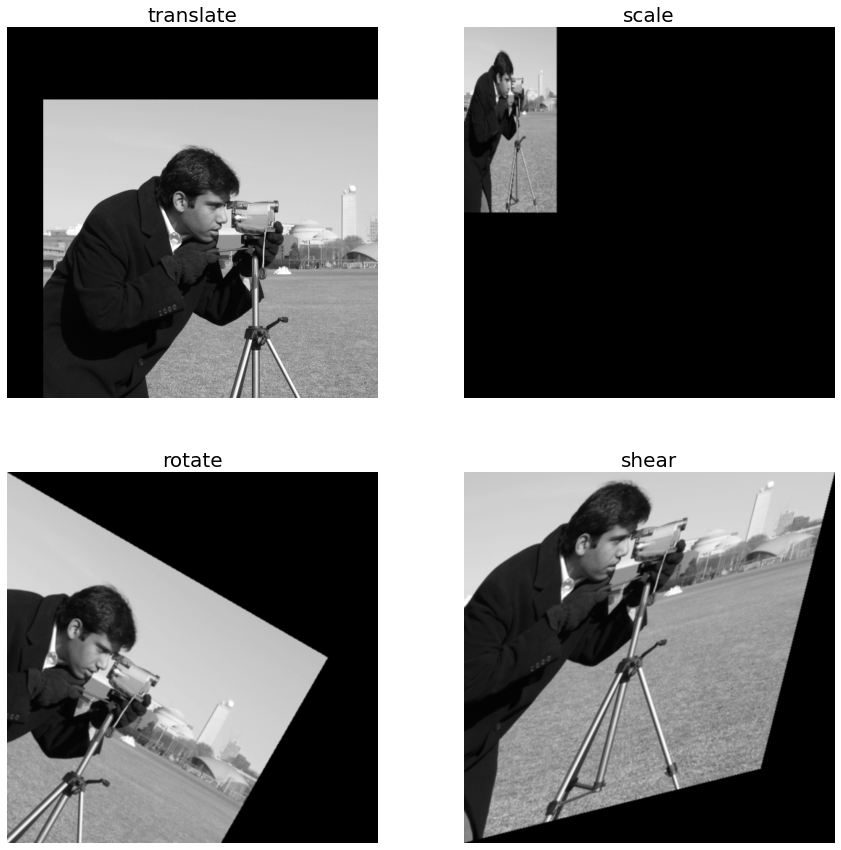

In [2]:
# Exercise 1

im = data.camera()

trT = np.array([
    [   1,   0,-100],
    [   0,   1, -50],
    [   0,   0,   1]
])
imTr = ndi.affine_transform(im, trT)

scT = np.array([
    [   2,   0,   0],
    [   0,   4,   0],
    [   0,   0,   1]
])
imSc = ndi.affine_transform(im, scT)

α = 30
θ = radians(α)
roT = np.array([
    [ cos(θ),-sin(θ),      0],
    [ sin(θ), cos(θ),      0],
    [      0,      0,      1]
])
imRo = ndi.affine_transform(im, roT)

shT = np.array([
    [   1,0.25,   0],
    [0.25,   1,   0],
    [   0,   0,   1]
])
imSh = ndi.affine_transform(im, shT)

plt.figure(figsize=(15, 15))
plt.subplot(221), plt.imshow(imTr, cmap='gray'), plt.axis('off'), plt.title('translate', size=20)
plt.subplot(222), plt.imshow(imSc, cmap='gray', interpolation='bicubic'), plt.axis('off'), plt.title('scale', size=20)
plt.subplot(223), plt.imshow(imRo, cmap='gray', interpolation='bicubic'), plt.axis('off'), plt.title('rotate', size=20)
plt.subplot(224), plt.imshow(imSh, cmap='gray', interpolation='bicubic'), plt.axis('off'), plt.title('shear', size=20)
plt.show()

(<matplotlib.image.AxesImage at 0x28087d02160>, (-0.5, 511.5, 511.5, -0.5))

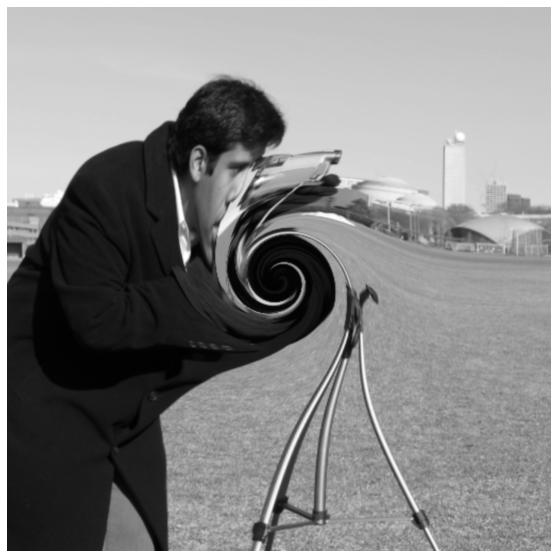

In [3]:
# Exercise 2

imSw = swirl(im, rotation=0, strength=10, radius=200)
plt.figure(figsize=(10, 10))
plt.imshow(imSw, cmap='gray', interpolation='bicubic'), plt.axis('off')

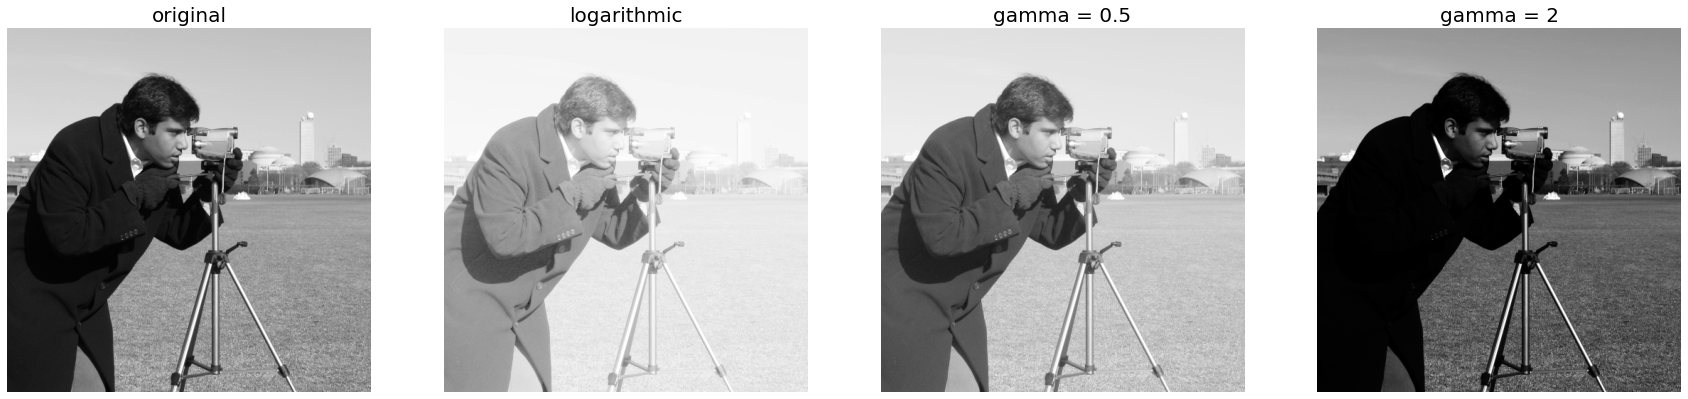

In [4]:
# Exercise 3

imLo = im + float_info.min
c = 255 / np.log10(1 + imLo.max())
imLo = c * np.log10(1 + imLo)
imLo = np.array(imLo, dtype=np.uint8)

c = 255
𝛾 = 0.5
imGa05 = c * (im / im.max()) ** 𝛾

c = 255
𝛾 = 2
imGa2 = c * (im / im.max()) ** 𝛾

plt.figure(figsize=(30, 15))
plt.subplot(141), plt.imshow(im, cmap='gray'), plt.axis('off'), plt.title('original', size=20)
plt.subplot(142), plt.imshow(imLo, cmap='gray'), plt.axis('off'), plt.title('logarithmic', size=20)
plt.subplot(143), plt.imshow(imGa05, cmap='gray'), plt.axis('off'), plt.title('gamma = 0.5', size=20)
plt.subplot(144), plt.imshow(imGa2, cmap='gray'), plt.axis('off'), plt.title('gamma = 2', size=20)
plt.show()

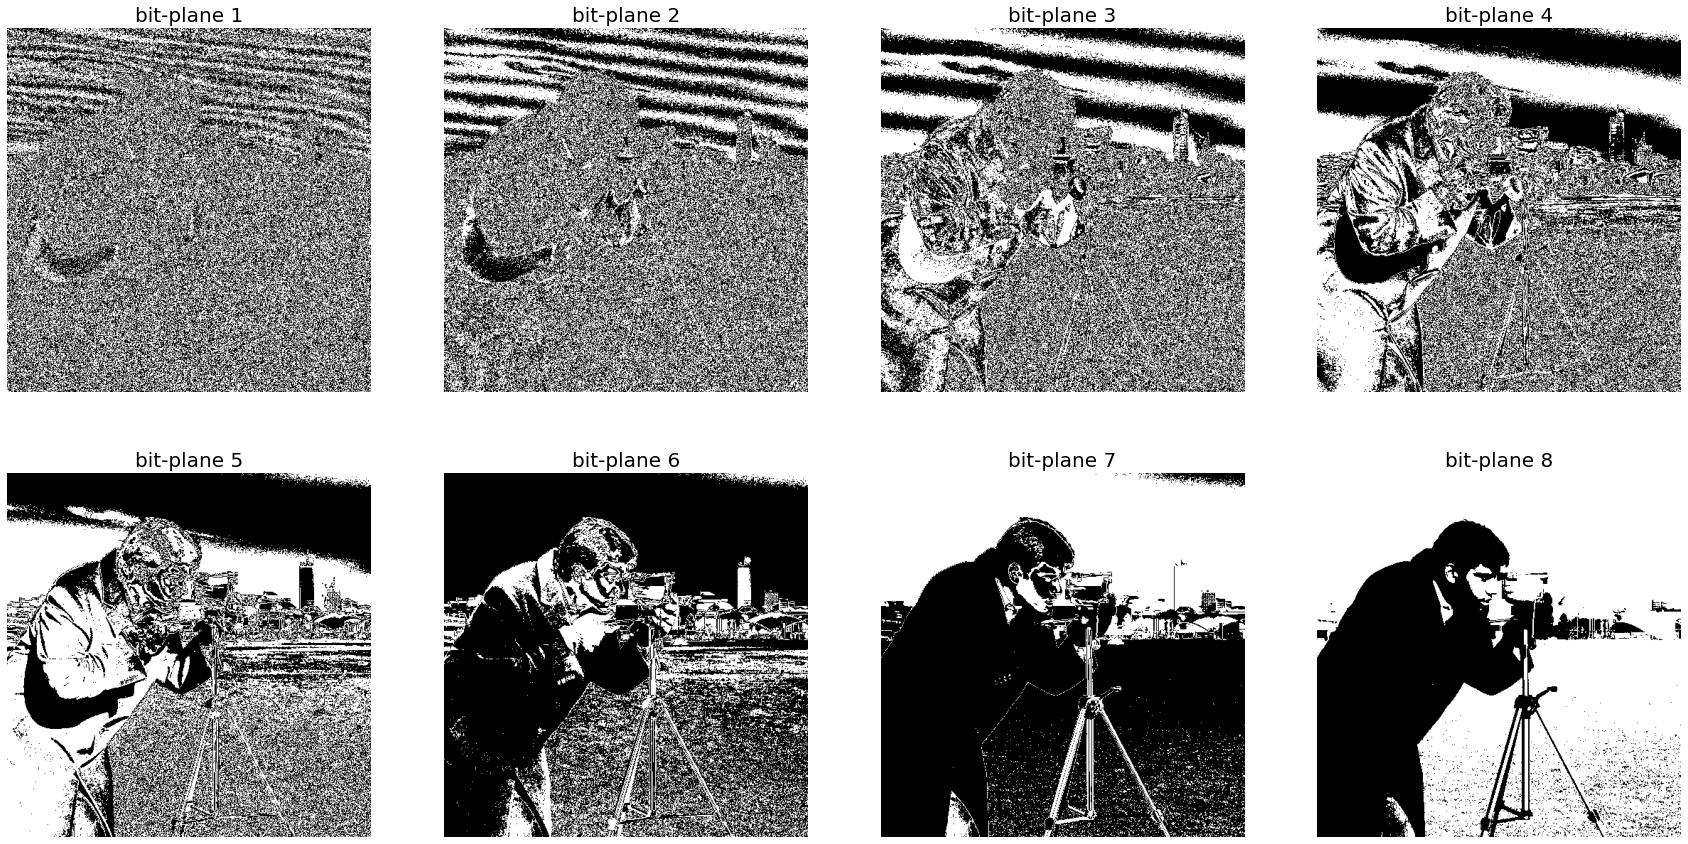

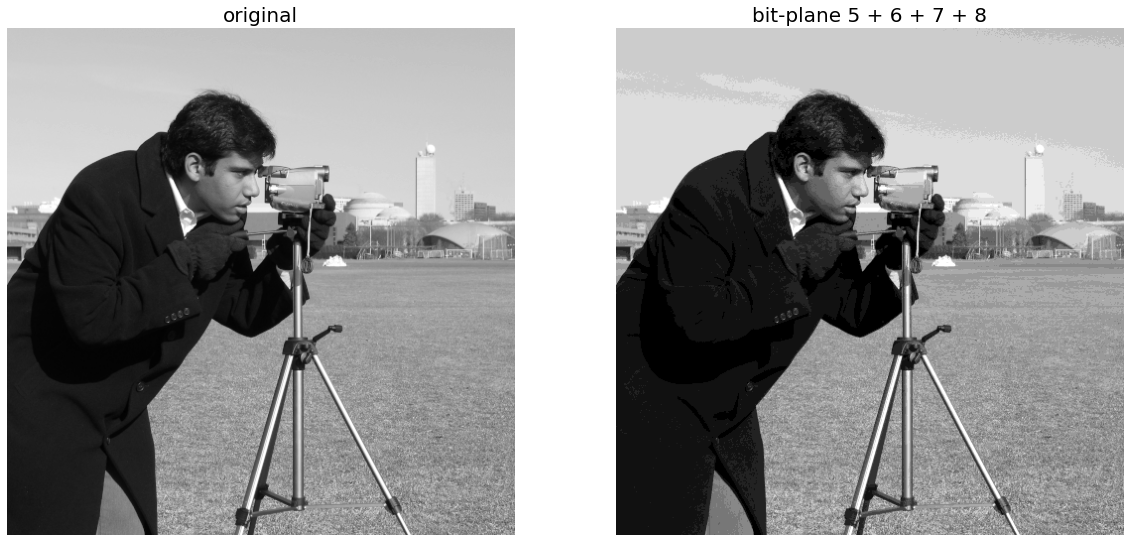

In [5]:
# Exercise 4

binary = []
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
         binary.append(np.binary_repr(im[i][j], width=8))

im1b = (np.array([int(i[7]) for i in binary], dtype = np.uint8) * 1).reshape(im.shape[0], im.shape[1])
im2b = (np.array([int(i[6]) for i in binary], dtype = np.uint8) * 2).reshape(im.shape[0], im.shape[1])
im3b = (np.array([int(i[5]) for i in binary], dtype = np.uint8) * 4).reshape(im.shape[0], im.shape[1])
im4b = (np.array([int(i[4]) for i in binary], dtype = np.uint8) * 8).reshape(im.shape[0], im.shape[1])
im5b = (np.array([int(i[3]) for i in binary], dtype = np.uint8) * 16).reshape(im.shape[0], im.shape[1])
im6b = (np.array([int(i[2]) for i in binary], dtype = np.uint8) * 32).reshape(im.shape[0], im.shape[1])
im7b = (np.array([int(i[1]) for i in binary], dtype = np.uint8) * 64).reshape(im.shape[0], im.shape[1])
im8b = (np.array([int(i[0]) for i in binary], dtype = np.uint8) * 128).reshape(im.shape[0], im.shape[1])

plt.figure(figsize=(30, 15))
plt.subplot(241), plt.imshow(im1b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 1', size=20)
plt.subplot(242), plt.imshow(im2b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 2', size=20)
plt.subplot(243), plt.imshow(im3b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 3', size=20)
plt.subplot(244), plt.imshow(im4b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 4', size=20)
plt.subplot(245), plt.imshow(im5b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 5', size=20)
plt.subplot(246), plt.imshow(im6b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 6', size=20)
plt.subplot(247), plt.imshow(im7b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 7', size=20)
plt.subplot(248), plt.imshow(im8b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 8', size=20)
plt.show()

im5678b = im5b + im6b + im7b + im8b

plt.figure(figsize=(20, 10))
plt.subplot(121), plt.imshow(im, cmap='gray'), plt.axis('off'), plt.title('original', size=20)
plt.subplot(122), plt.imshow(im5678b, cmap='gray'), plt.axis('off'), plt.title('bit-plane 5 + 6 + 7 + 8', size=20)
plt.show()